Import packages

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # default figure size
plt.rcParams['font.size'] = 12           # default font size
plt.rcParams['font.family'] = 'Times New Roman'

Data preparation

In [ ]:
df = pd.read_csv('../data/energydata_complete_cleaned.csv', parse_dates=['date'], index_col='date')
df.sort_index(inplace=True)
print('Data shape: ', df.shape)

# Define features and target variable
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
            'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 
            'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 
            'Visibility', 'Tdewpoint', 'hour_of_day', 'day_of_week', 
            'is_weekend', 'hour_sin', 'hour_cos', 'day_of_week_sin', 
            'day_of_week_cos', 'Appliances_lag1', 'Appliances_rolling_mean_6']
target = 'Appliances'
print('Feature number: ', len(features))

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Data shape:  (19591, 37)
Feature number:  34
Training data shape:  (13713, 34)
Testing data shape:  (5878, 34)


In [22]:
model_results = {}

Linear Regression

Linear Regression Coefficients:  [ 9.09729764e-01 -7.53223723e+00 -4.44940680e+00  4.28044338e+00
  2.33281448e+00  5.78451505e+00  8.41110764e-01 -2.37004245e+00
  3.20092729e-02  1.33668689e+00 -3.94574103e-02 -2.59989440e-01
 -4.71942361e-02  1.88940887e+00 -4.09617929e-01  1.17469137e+00
  1.12329110e+00 -2.09246773e+00  6.30985612e-01 -1.47546927e+00
 -3.01054385e-03 -1.31329621e-01  2.01718311e-01  3.97218521e-03
  1.11710952e+00 -2.15298975e-01 -1.20017524e+00  1.05906307e+00
 -1.37272076e+01 -1.47933119e+01 -3.82393990e+00 -2.49613995e+00
  6.78297931e-01  5.49096012e-02]
Mean Squared Error: 4445.101050250777
Mean Absolute Error: 30.299573576998515
R^2 Score: 0.5808457294128013


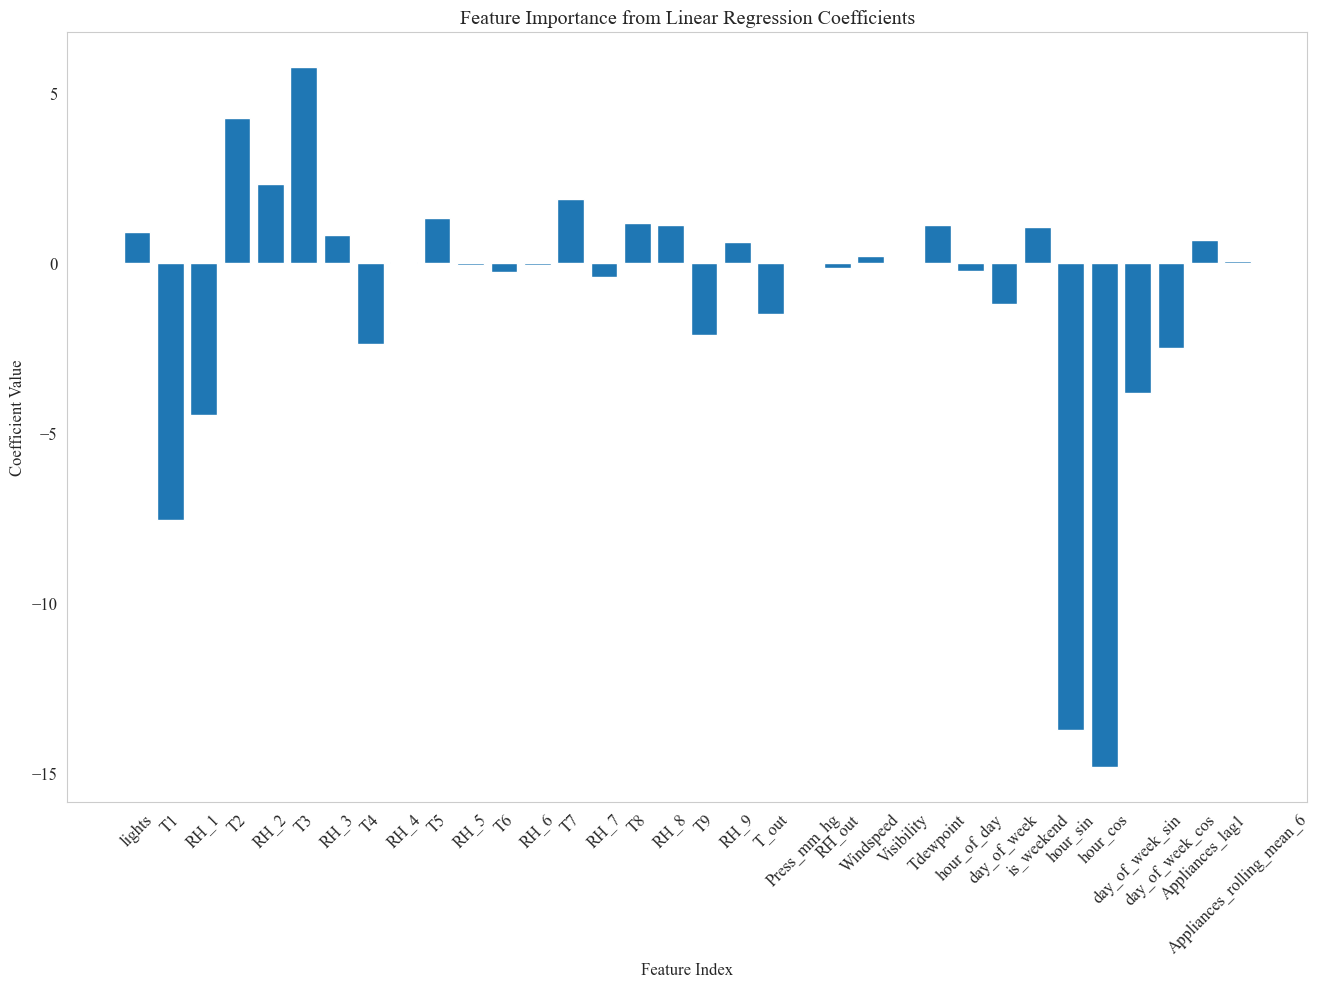

In [23]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression Coefficients: ", lin_reg.coef_)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# model_results['Linear Regression'] = {
#     'predictions': y_pred,
#     'MSE': mse,
#     'MAE': mae,
#     'R2': r2
# }

# Feature coefficients analysis
importance = lin_reg.coef_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression Coefficients')
plt.grid()
plt.show()

Support vector regression

In [24]:
svr = SVR(kernel='rbf', C=10)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR Mean Absolute Error: {mae_svr}")
print(f"SVR R^2 Score: {r2_svr}")

model_results['Support Vector Regression'] = {
    'predictions': y_pred_svr,
    'MSE': mse_svr,
    'MAE': mae_svr,
    'R2': r2_svr
}

SVR Mean Squared Error: 4588.646267183087
SVR Mean Absolute Error: 27.217821253757617
SVR R^2 Score: 0.567310021220937


Decision Tree

In [25]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree Mean Absolute Error: {mae_dt}")
print(f"Decision Tree R^2 Score: {r2_dt}")

# model_results['Decision Tree'] = {
#     'predictions': y_pred_dt,
#     'MSE': mse_dt,
#     'MAE': mae_dt,
#     'R2': r2_dt
# }

Decision Tree Mean Squared Error: 8273.273222184416
Decision Tree Mean Absolute Error: 38.2425995236475
Decision Tree R^2 Score: 0.21986524859369105


Random forest regression

Random Forest Mean Squared Error: 4540.287369853691
Random Forest Mean Absolute Error: 30.300952705001702
Random Forest R^2 Score: 0.5718700611631922


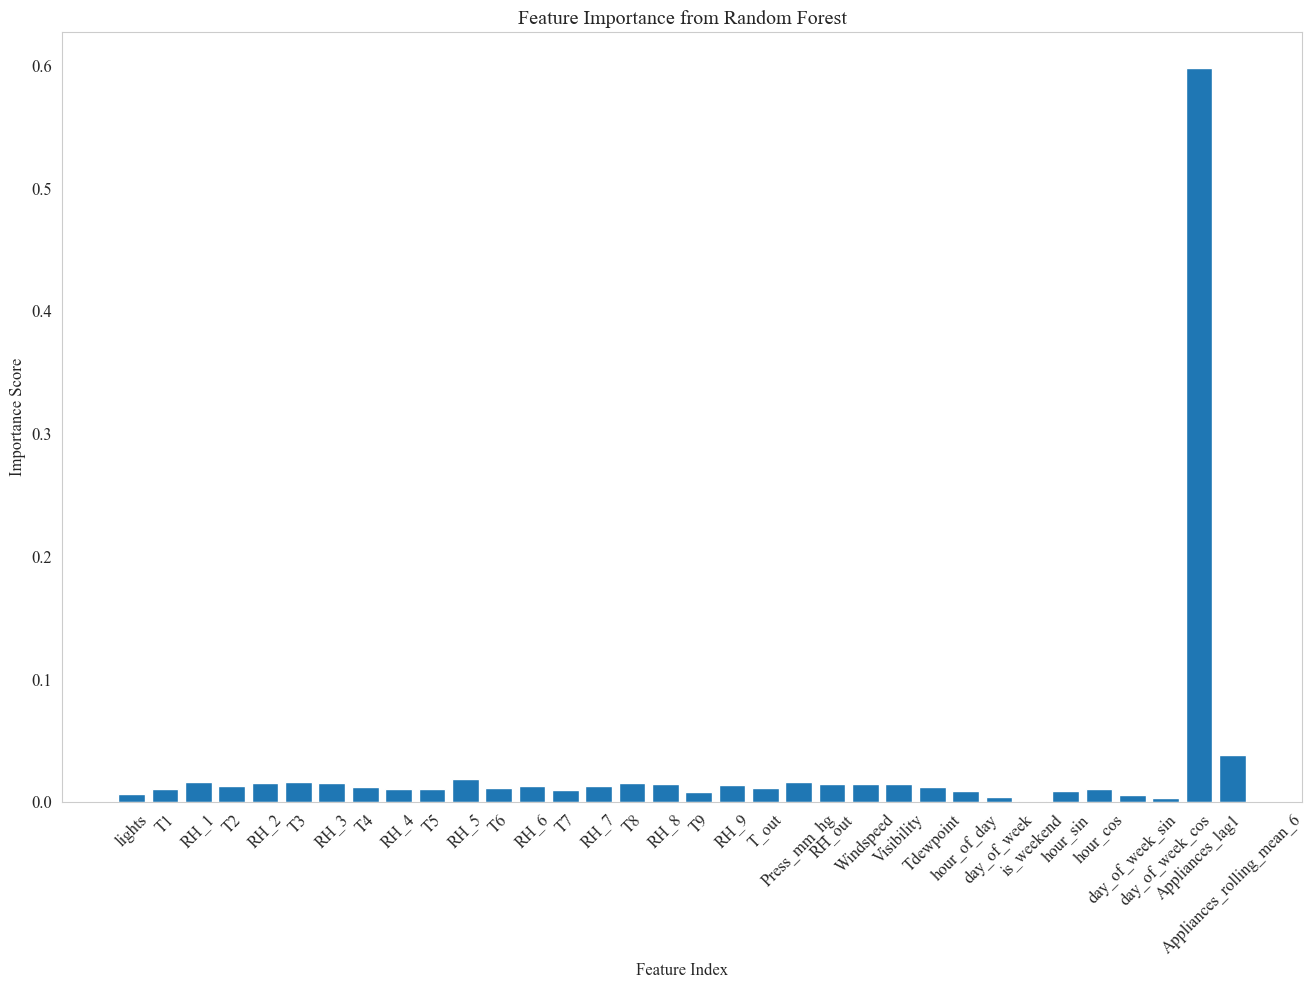

In [26]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

model_results['Random Forest'] = {
    'predictions': y_pred_rf,
    'MSE': mse_rf,
    'MAE': mae_rf,
    'R2': r2_rf
}

# Feature importance from Random Forest
importances = rf_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importances))], importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.grid()
plt.show()

XGBoost

XGBoost Mean Squared Error: 4594.76611328125
XGBoost Mean Absolute Error: 30.438257217407227
XGBoost R^2 Score: 0.5667328834533691


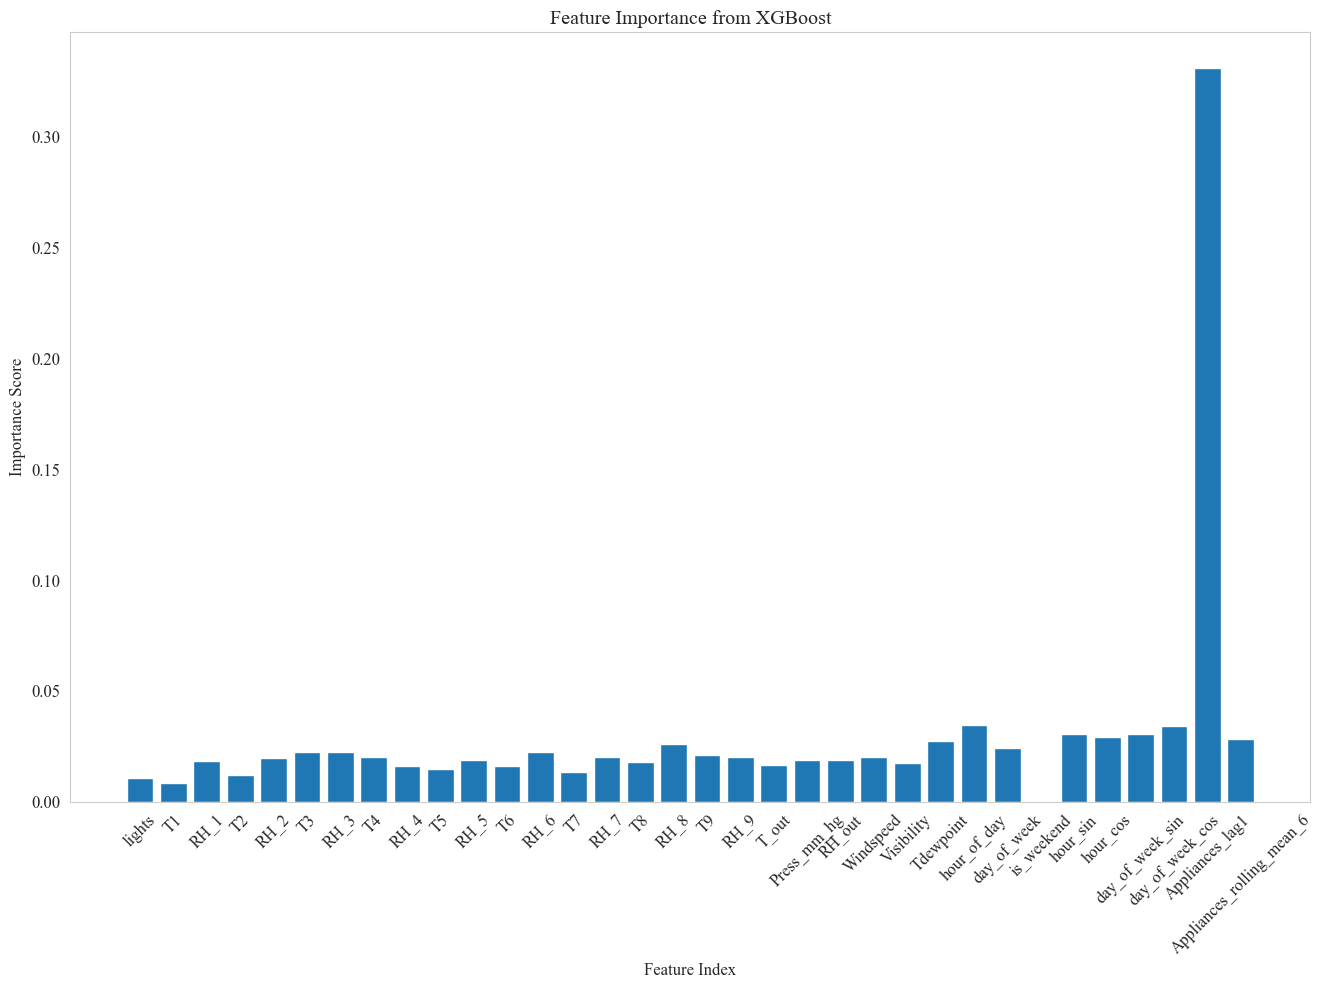

In [27]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost Mean Absolute Error: {mae_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")

model_results['XGBoost'] = {
    'predictions': y_pred_xgb,
    'MSE': mse_xgb,
    'MAE': mae_xgb,
    'R2': r2_xgb
}

# Feature importance from XGBoost
xgb_importances = xgb_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(xgb_importances))], xgb_importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from XGBoost')
plt.grid()
plt.show()

Multi-layer Perceptron

In [28]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=100,
    early_stopping=True,
    learning_rate_init=0.001
)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"MLP Mean Squared Error: {mse_mlp}")
print(f"MLP Mean Absolute Error: {mae_mlp}")
print(f"MLP R^2 Score: {r2_mlp}")

model_results['Multi-layer Perceptron'] = {
    'predictions': y_pred_mlp,
    'MSE': mse_mlp,
    'MAE': mae_mlp,
    'R2': r2_mlp
}

MLP Mean Squared Error: 4341.163151044729
MLP Mean Absolute Error: 29.901648656740367
MLP R^2 Score: 0.5906466346870737


Results and visualisation

In [29]:
results_comparison = pd.DataFrame({
    model: {
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'R2': metrics['R2']
    }
    for model, metrics in model_results.items()
}).T.round(4)

print("Model Performance Metrics Comparison:")
print(results_comparison)

Model Performance Metrics Comparison:
                                 MSE      MAE      R2
Support Vector Regression  4588.6463  27.2178  0.5673
Random Forest              4540.2874  30.3010  0.5719
XGBoost                    4594.7661  30.4383  0.5667
Multi-layer Perceptron     4341.1632  29.9016  0.5906


Energy Consumption Prediction Comparison Across Models

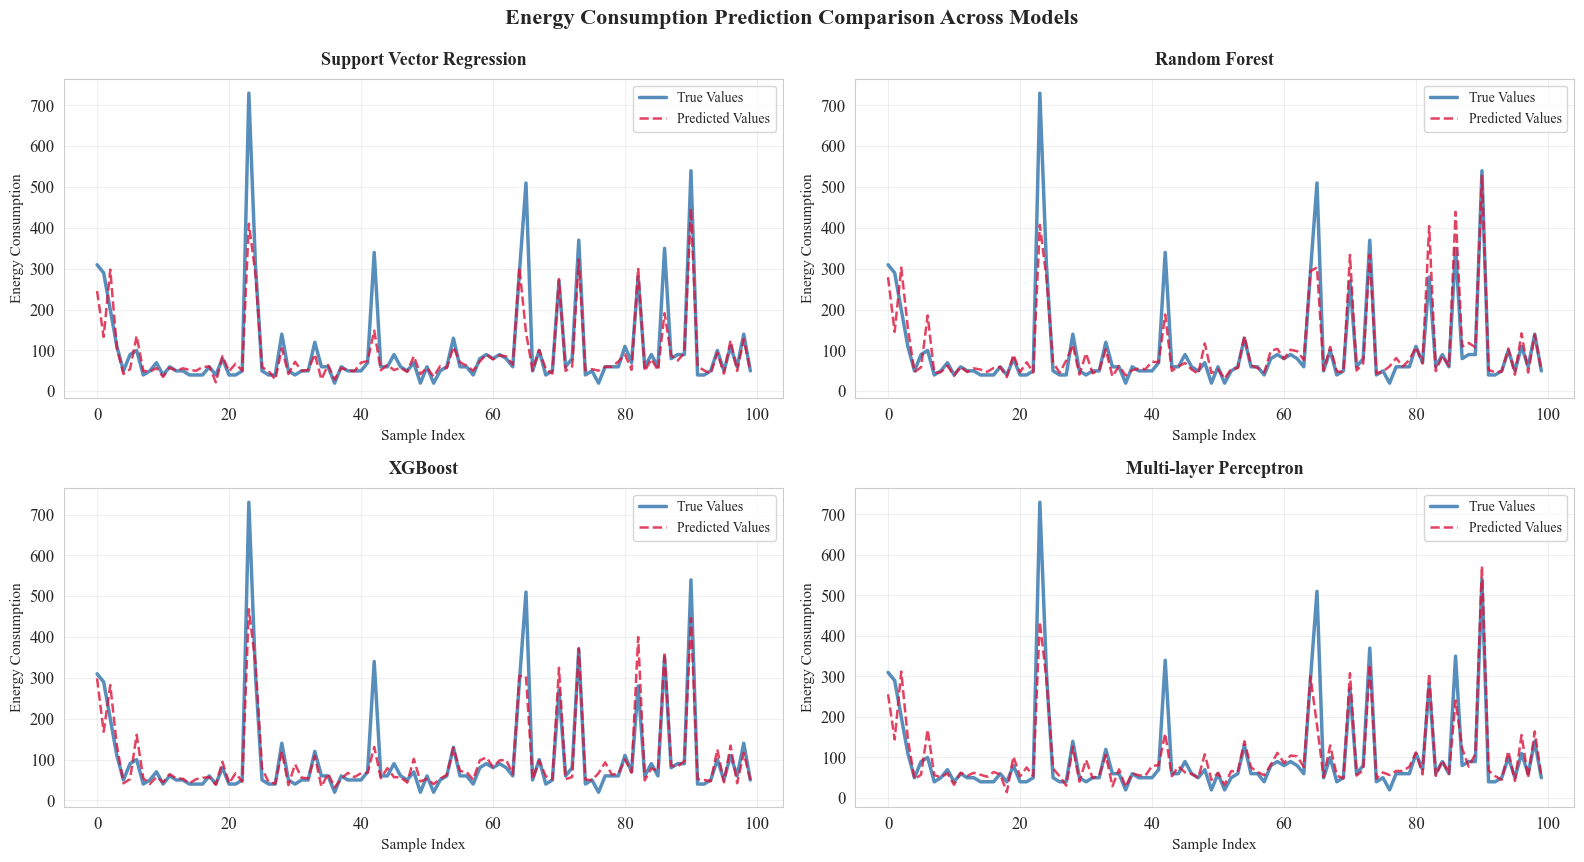

In [35]:
plt.figure(figsize=(16, 12))
sample_count = min(100, len(y_test))

for idx, (model_name, results) in enumerate(model_results.items(), 1):
    plt.subplot(3, 2, idx)

    y_pred = results['predictions']

    plt.plot(range(sample_count), y_test.values[:sample_count],
             'steelblue', linewidth=2.5, label='True Values', alpha=0.9)
    plt.plot(range(sample_count), y_pred[:sample_count],
             'crimson', linestyle='--', linewidth=1.8, label='Predicted Values', alpha=0.8)

    plt.title(f'{model_name}', fontsize=13, fontweight='bold', pad=10)
    plt.xlabel('Sample Index', fontsize=11)
    plt.ylabel('Energy Consumption', fontsize=11)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Energy Consumption Prediction Comparison Across Models', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../results/prediction_plots/model_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Model performance comparison

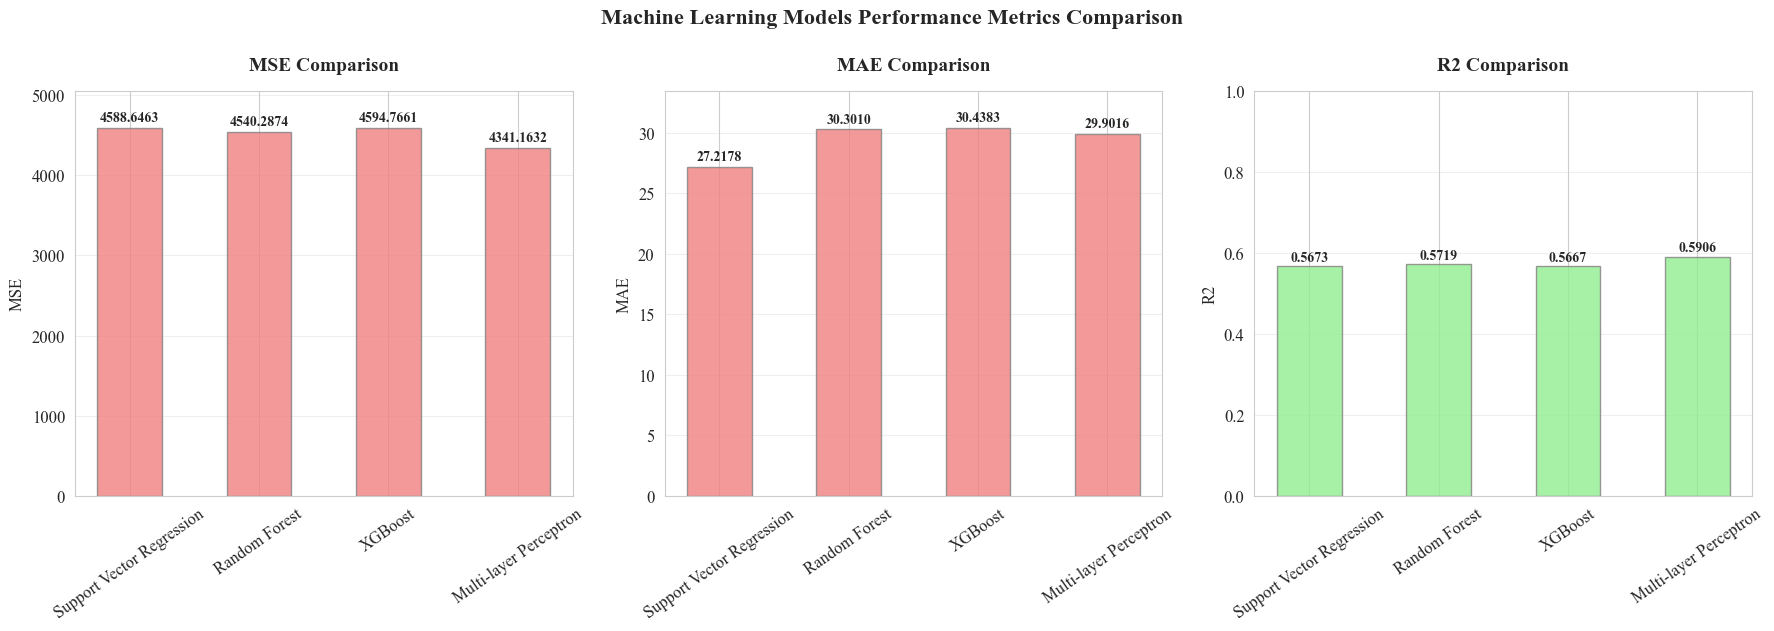

In [31]:
metric_names = ['MSE', 'MAE', 'R2']
model_names = list(model_results.keys())

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metric_names):
    metric_values = [model_results[model][metric] for model in model_names]

    bar_colors = ['lightcoral' if metric in ['MSE', 'MAE'] else 'lightgreen' for _ in model_names]

    bars = axes[i].bar(model_names, metric_values, width=0.5, color=bar_colors, alpha=0.8, edgecolor='grey')
    axes[i].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold', pad=15)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].tick_params(axis='x', rotation=35)
    axes[i].grid(True, alpha=0.3, axis='y')
    if metric in ['MSE', 'MAE']:
        axes[i].set_ylim(0, max(metric_values) * 1.1)
    elif metric == 'R2':
        axes[i].set_ylim(0, 1)

    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2., height + max(metric_values) * 0.01,
                     f'{value:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.suptitle('Machine Learning Models Performance Metrics Comparison', fontsize=16, fontweight='bold', y=1.05)
plt.savefig('../results/prediction_plots/model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Predicted vs True Values Scatter Plot

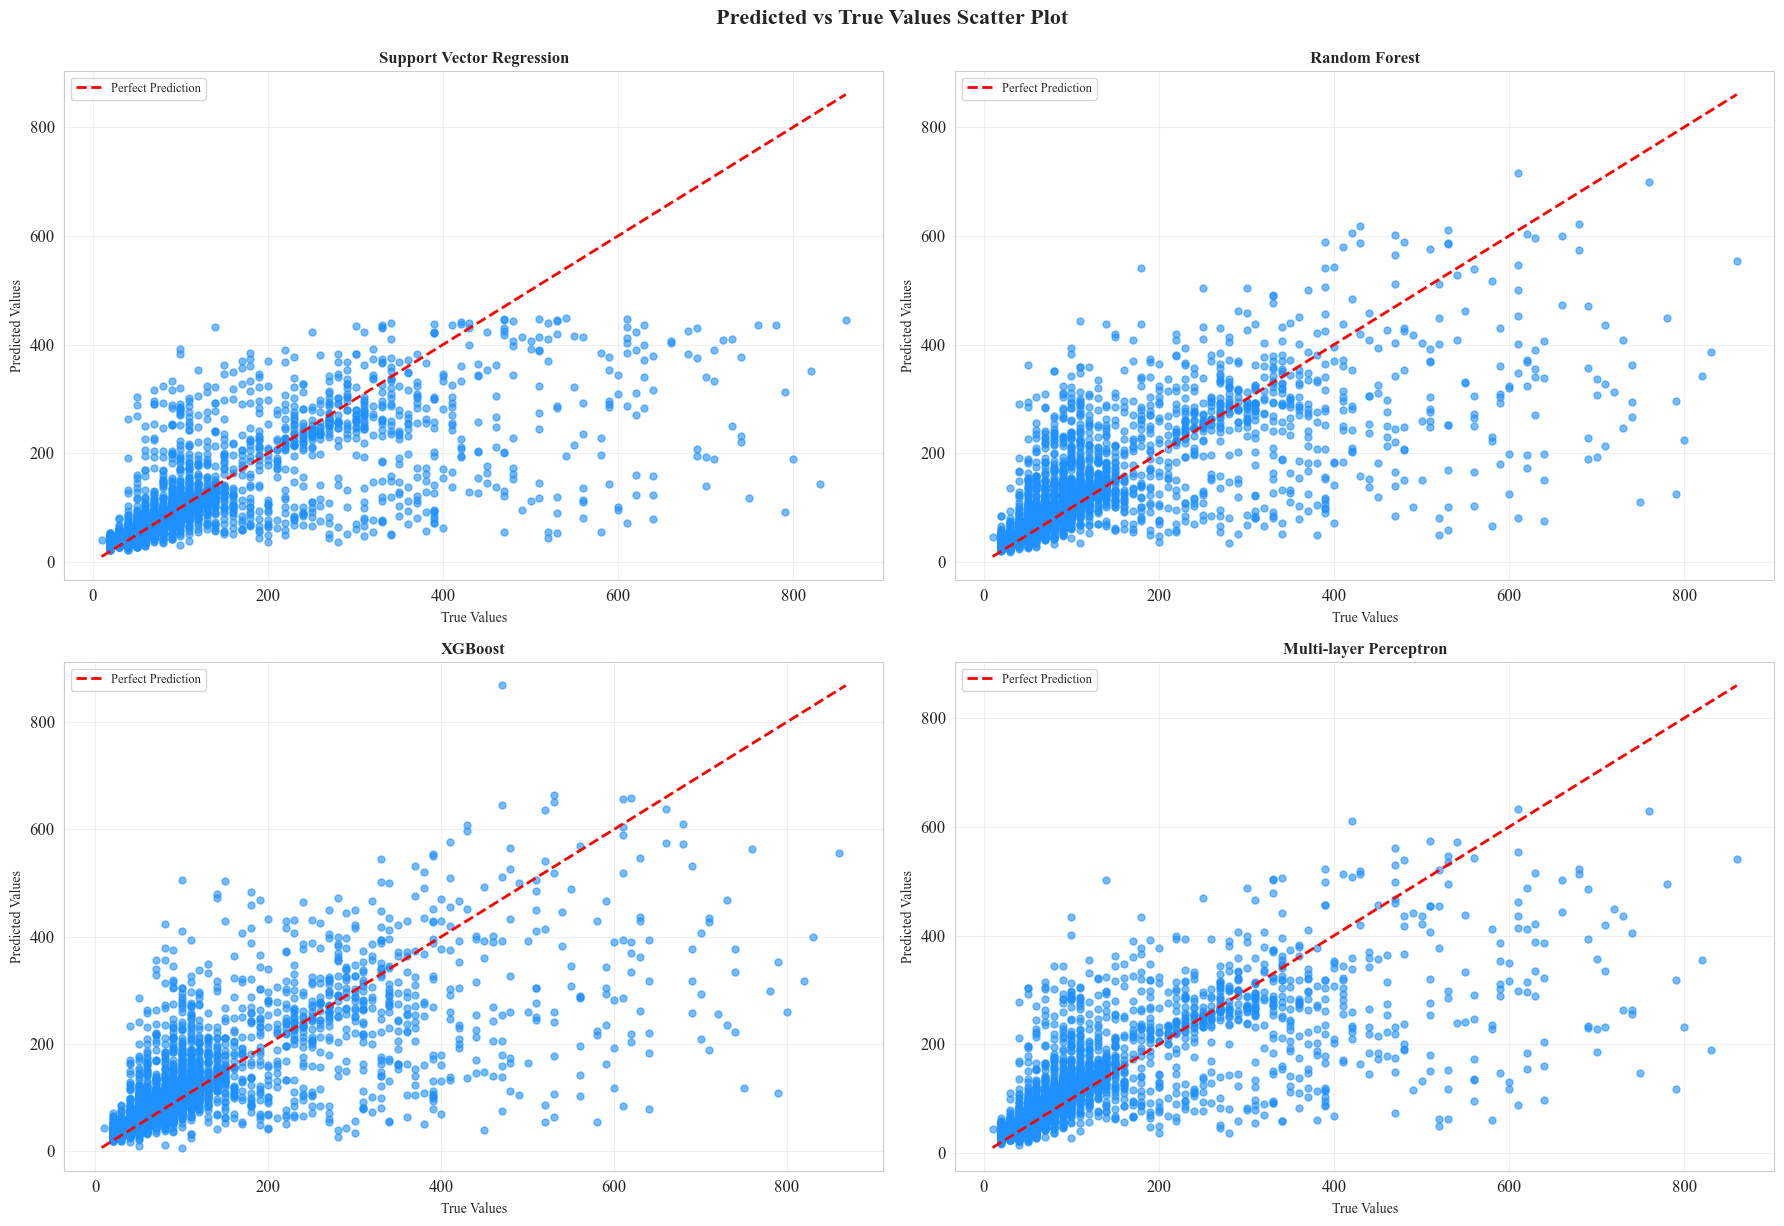

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(model_results.items()):
    y_pred = results['predictions']

    axes[idx].scatter(y_test, y_pred, alpha=0.6, s=25, color='dodgerblue')

    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'red', linestyle='--',
                   linewidth=2, label='Perfect Prediction')

    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('True Values', fontsize=10)
    axes[idx].set_ylabel('Predicted Values', fontsize=10)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(model_results), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Predicted vs True Values Scatter Plot', fontsize=16, fontweight='bold', y=1.02)
plt.show()

Model performance ranking

In [33]:
r2_rankings = sorted(model_results.items(), key=lambda x: x[1]['R2'], reverse=True)
print("\nR² Score Ranking (Higher is Better):")
for rank, (model, metrics) in enumerate(r2_rankings, 1):
    print(f"  Rank {rank}: {model:25} R² = {metrics['R2']:.4f}")

mse_rankings = sorted(model_results.items(), key=lambda x: x[1]['MSE'])
print("\nMSE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(mse_rankings, 1):
    print(f"  Rank {rank}: {model:25} MSE = {metrics['MSE']:.4f}")

mae_rankings = sorted(model_results.items(), key=lambda x: x[1]['MAE'])
print("\nMAE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(mae_rankings, 1):
    print(f"  Rank {rank}: {model:25} MAE = {metrics['MAE']:.4f}")

best_r2_model = r2_rankings[0][0]
best_mse_model = mse_rankings[0][0]
best_mae_model = mae_rankings[0][0]

print("\n" + "Best Model Summary " + "=" * 40)
print(f"  Best R² Model:  {best_r2_model} (R² = {model_results[best_r2_model]['R2']:.4f})")
print(f"  Best MSE Model: {best_mse_model} (MSE = {model_results[best_mse_model]['MSE']:.4f})")
print(f"  Best MAE Model: {best_mae_model} (MAE = {model_results[best_mae_model]['MAE']:.4f})")

top_models = {best_r2_model, best_mse_model, best_mae_model}
if len(top_models) == 1:
    overall_best = list(top_models)[0]
    print(f"\nOverall Best Model: {overall_best}")
    print(f"  This model performs best on all three metrics!")
else:
    print(f"\nDifferent models excel in different metrics:")
    print(f"  - For prediction accuracy → Choose {best_r2_model} (Highest R²)")
    print(f"  - For error control → Choose {best_mse_model} (Lowest MSE)")


R² Score Ranking (Higher is Better):
  Rank 1: Multi-layer Perceptron    R² = 0.5906
  Rank 2: Random Forest             R² = 0.5719
  Rank 3: Support Vector Regression R² = 0.5673
  Rank 4: XGBoost                   R² = 0.5667

MSE Ranking (Lower is Better):
  Rank 1: Multi-layer Perceptron    MSE = 4341.1632
  Rank 2: Random Forest             MSE = 4540.2874
  Rank 3: Support Vector Regression MSE = 4588.6463
  Rank 4: XGBoost                   MSE = 4594.7661

MAE Ranking (Lower is Better):
  Rank 1: Support Vector Regression MAE = 27.2178
  Rank 2: Multi-layer Perceptron    MAE = 29.9016
  Rank 3: Random Forest             MAE = 30.3010
  Rank 4: XGBoost                   MAE = 30.4383

Best Model Summary ========================================
  Best R² Model:  Multi-layer Perceptron (R² = 0.5906)
  Best MSE Model: Multi-layer Perceptron (MSE = 4341.1632)
  Best MAE Model: Support Vector Regression (MAE = 27.2178)

Different models excel in different metrics:
  - For predictio